<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Elvis! Congratulations on submitting another project! 🎉
    

I will be using the standard color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. You have successfully analyzed the distributions, employed advanced techniques such as lemmatization and vectorizing, and trained several models. Great job! The results look very good.

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. There are only two such issues: 
    
    
- Please consider normalizing the data for the reason I stated in [this comment](#1).
    
    
    
- Please describe the constant model's performance. 
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you for such an excellent job! You showed strong coding skills and a solid understanding of this topic, which is quite hard. I hope you enjoyed working on this project. The updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    


<hr> 
    
✍️ If you are interested in Large Language Models, check out [Intro to Large Language Models](https://www.youtube.com/watch?v=zjkBMFhNj_g) and [Tokenization lecture](https://www.youtube.com/watch?v=zduSFxRajkE) by Andrej Karpathy, one of the leading scientists in this area.  He has also recently published a nice [Deep Dive into LLMs like ChatGPT](https://www.youtube.com/watch?v=7xTGNNLPyMI) tutorial where he explains all LLM preparation stages and a very useful video about how he uses LLM [here](https://www.youtube.com/watch?v=EWvNQjAaOHw&feature=youtu.be). This is a comprehensive guide on how to choose the optimal tool for your tasks while saving time and money.
 
    
    
I would also like to recommend this new <font color='purple'>**Language Modeling from Scratch Spring 2025 class by Stanford**</font>. This class has just started. There are three links: [Recorded lectures on Youtube](https://www.youtube.com/playlist?list=PLoROMvodv4rOY23Y0BoGoBGgQ1zmU_MT_), [course website](https://stanford-cs336.github.io/spring2025/), and the [GitHub repository with assignments and jupyter notebooks](https://github.com/stanford-cs336). This course is up-to-date, so the information there is super relevant today.

    
    
By the way, Hugging Face has a good free [NLP course](https://huggingface.co/learn/nlp-course/en/chapter0/1).
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
        
    
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

<h1 align = "center"><span style = "font-size: 2em; font-weight: bold"> SPRINT 14 - PROJECT </span></h1>

<h1 align = "center"><span style = "font-size: 1em; font-weight: bold"> Title: NEGATIVE MOVIE REVIEW DETECTION</span></h1>

# **Objectives:**

- Load and clean IMDB review data.
- Explore data and check class balance.
- Preprocess text for models.
- Train and test 3+ classification models.
- Classify custom reviews with all models.
- Compare model performance on test data and custom reviews.
- Present findings on negative review detection.

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction that reflects the core goal. Well done!  
    
</div>

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [6]:
df_reviews.shape

(47331, 17)

In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

## EDA

Let's check the number of movies and reviews over years.

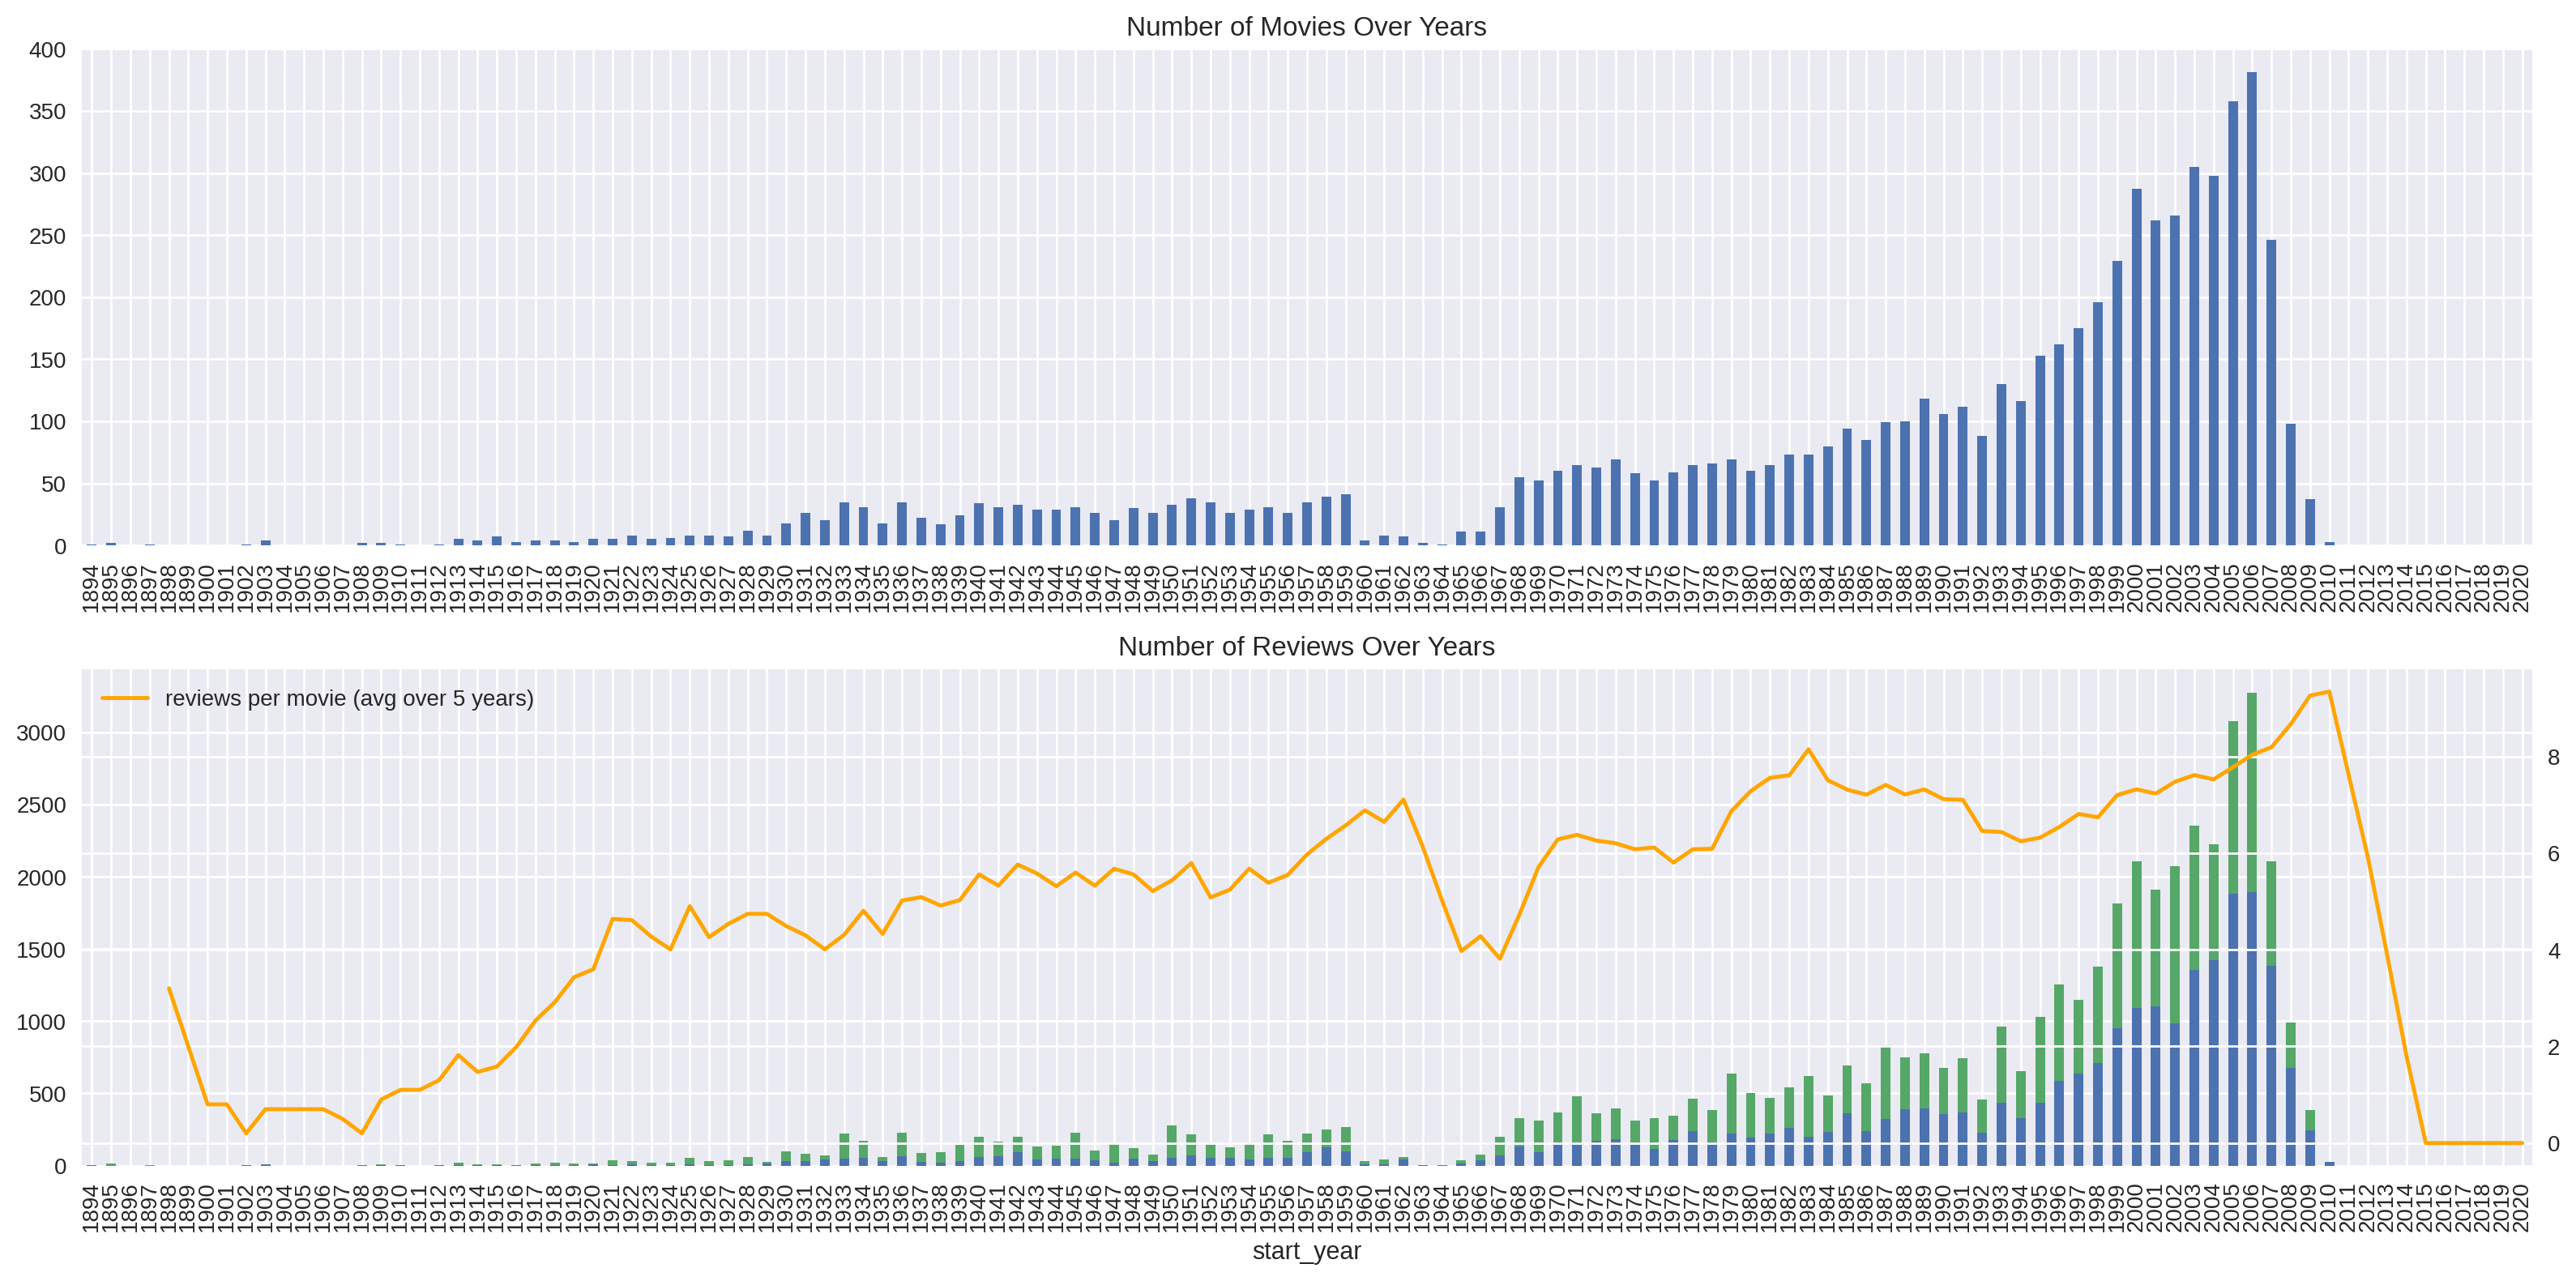

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

**Observations from 'Number of Movies Over Years' plots:**
* The number of movies seems to have increased significantly over the years.
* Similarly, the number of reviews also shows an upward trend, particularly in more recent years.
* The rolling average of reviews per movie (over 5 years) fluctuates but also appears to increase in later years, suggesting potentially more engagement or more reviews per movie in recent times.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
So we can see a steady increase in the number of movies. The avgerage number of reviews also increases.

</div>

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

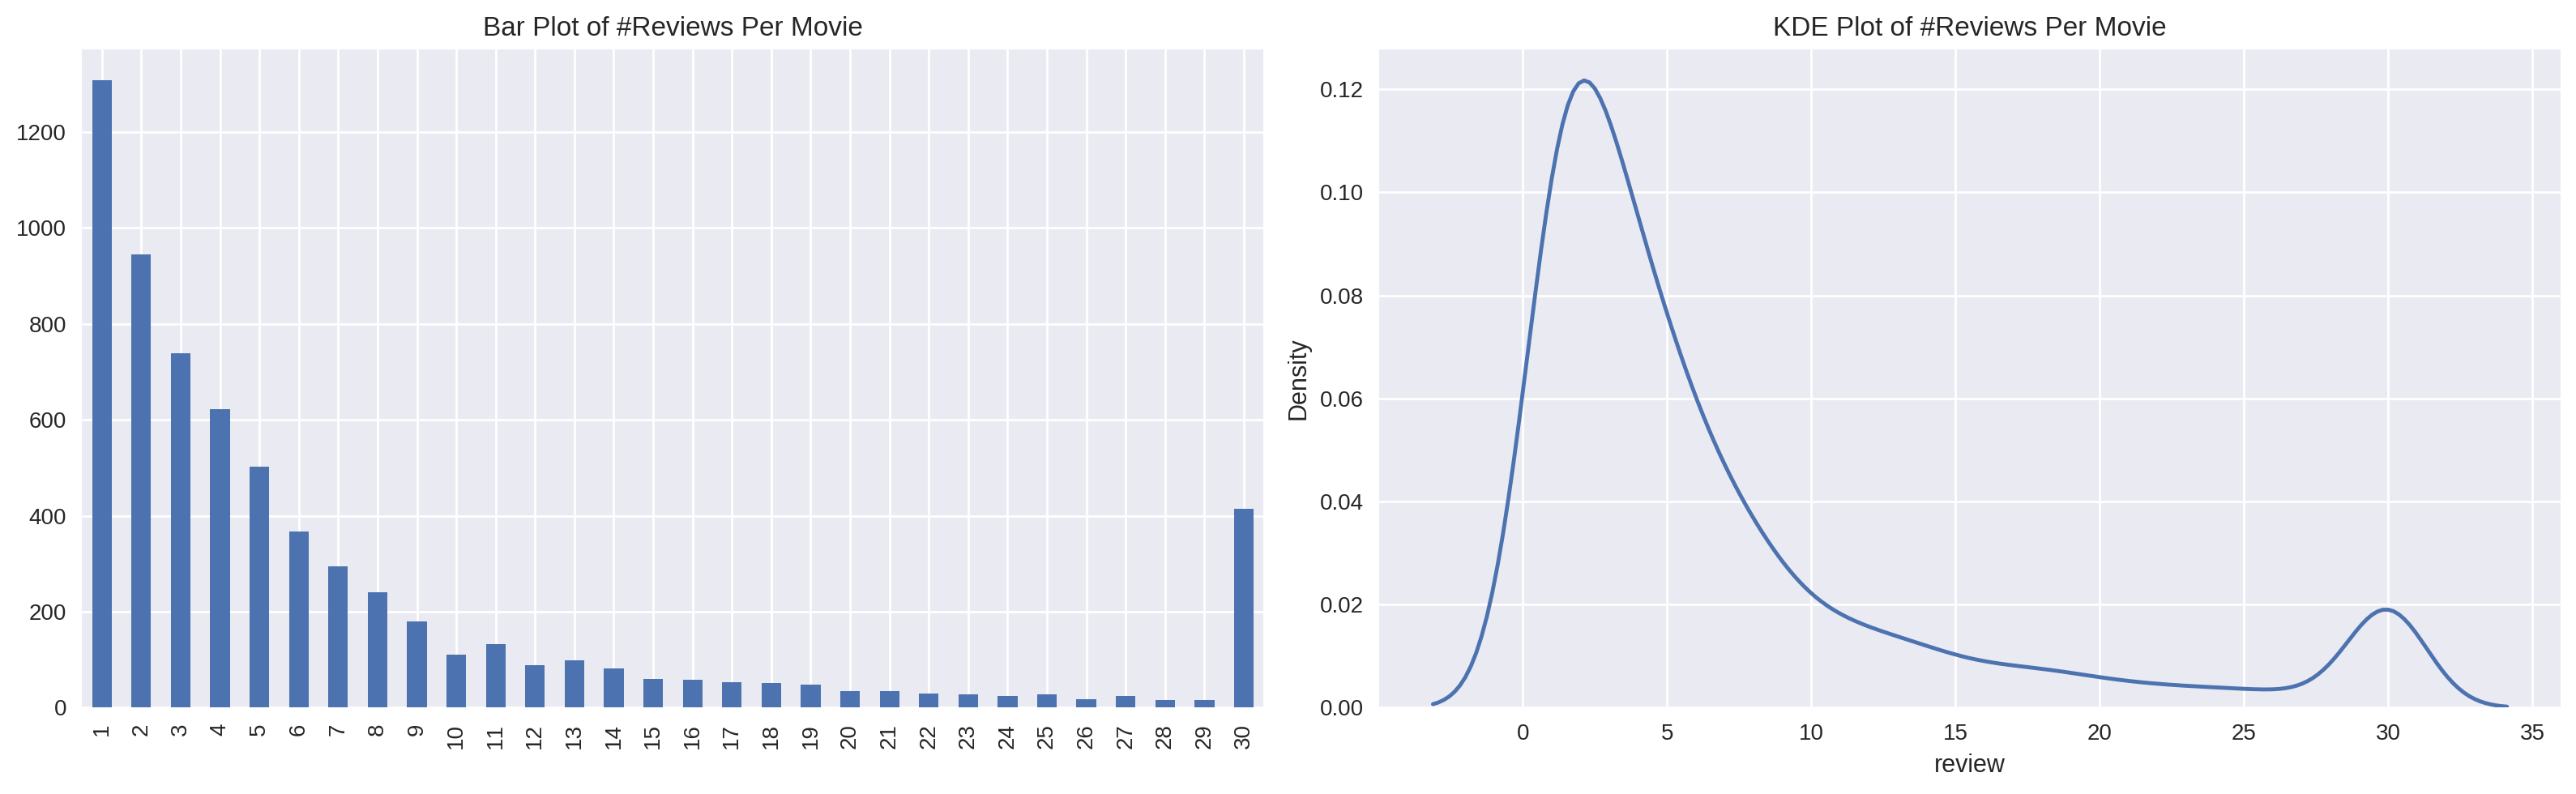

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

**Observations from 'Distribution of #Reviews Per Movie' plots:**
* he bar plot shows that most movies have a relatively small number of reviews, with the count decreasing sharply as the number of reviews increases. This suggests a long-tailed distribution.
* The KDE plot provides a smoother estimate of this distribution, reinforcing the observation that lower review counts are more common.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Correct.
</div>

In [10]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

This output shows the number of negative (0) and positive (1) reviews in the entire dataset. We can see that the counts are quite similar, indicating a relatively balanced dataset.

Proportion of each sentiment:<br>
0    0.501046<br>
1    0.498954<br>
Name: pos, dtype: float64

**Conclusion on Class Balance (from EDA): The dataset is relatively balanced in terms of positive and negative reviews.**

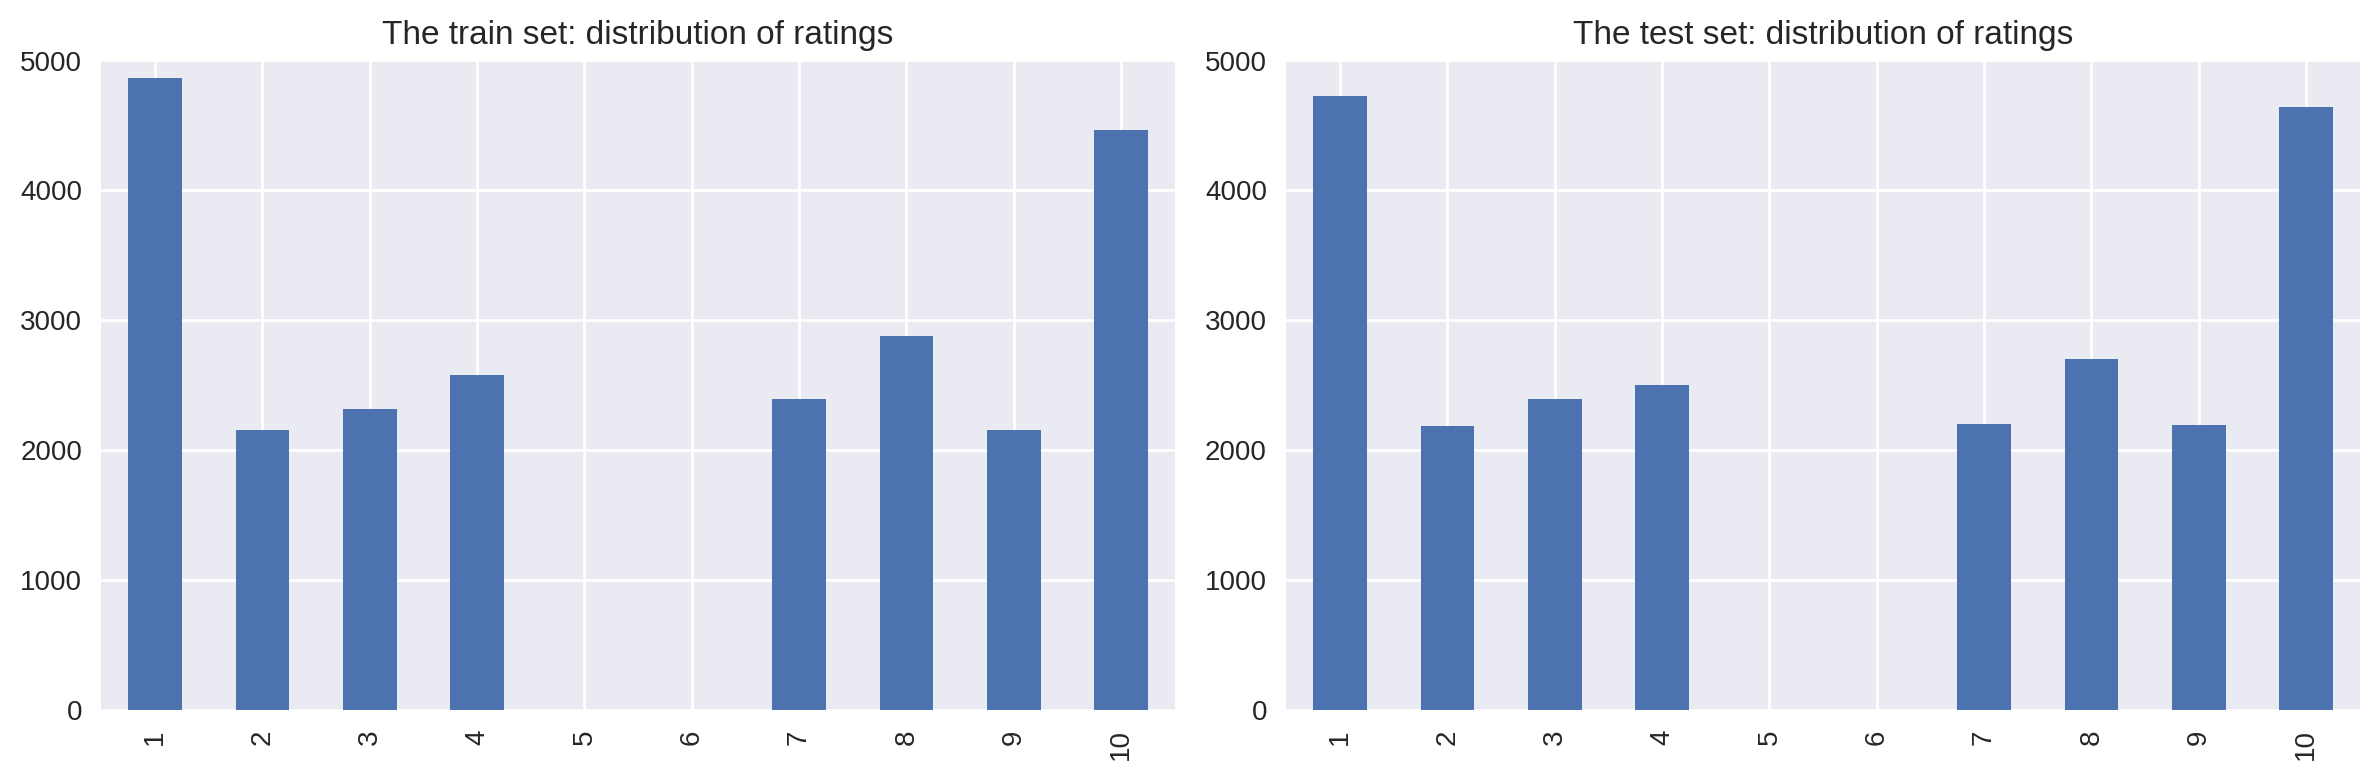

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

**Observations from 'Distribution of Ratings' plots:**
- The distribution of ratings appears somewhat similar between the training and testing datasets.
- There isn't a completely uniform distribution of ratings, with peaks at certain rating values.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Good! 

</div>

Distribution of negative and positive reviews over the years for two parts of the dataset

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


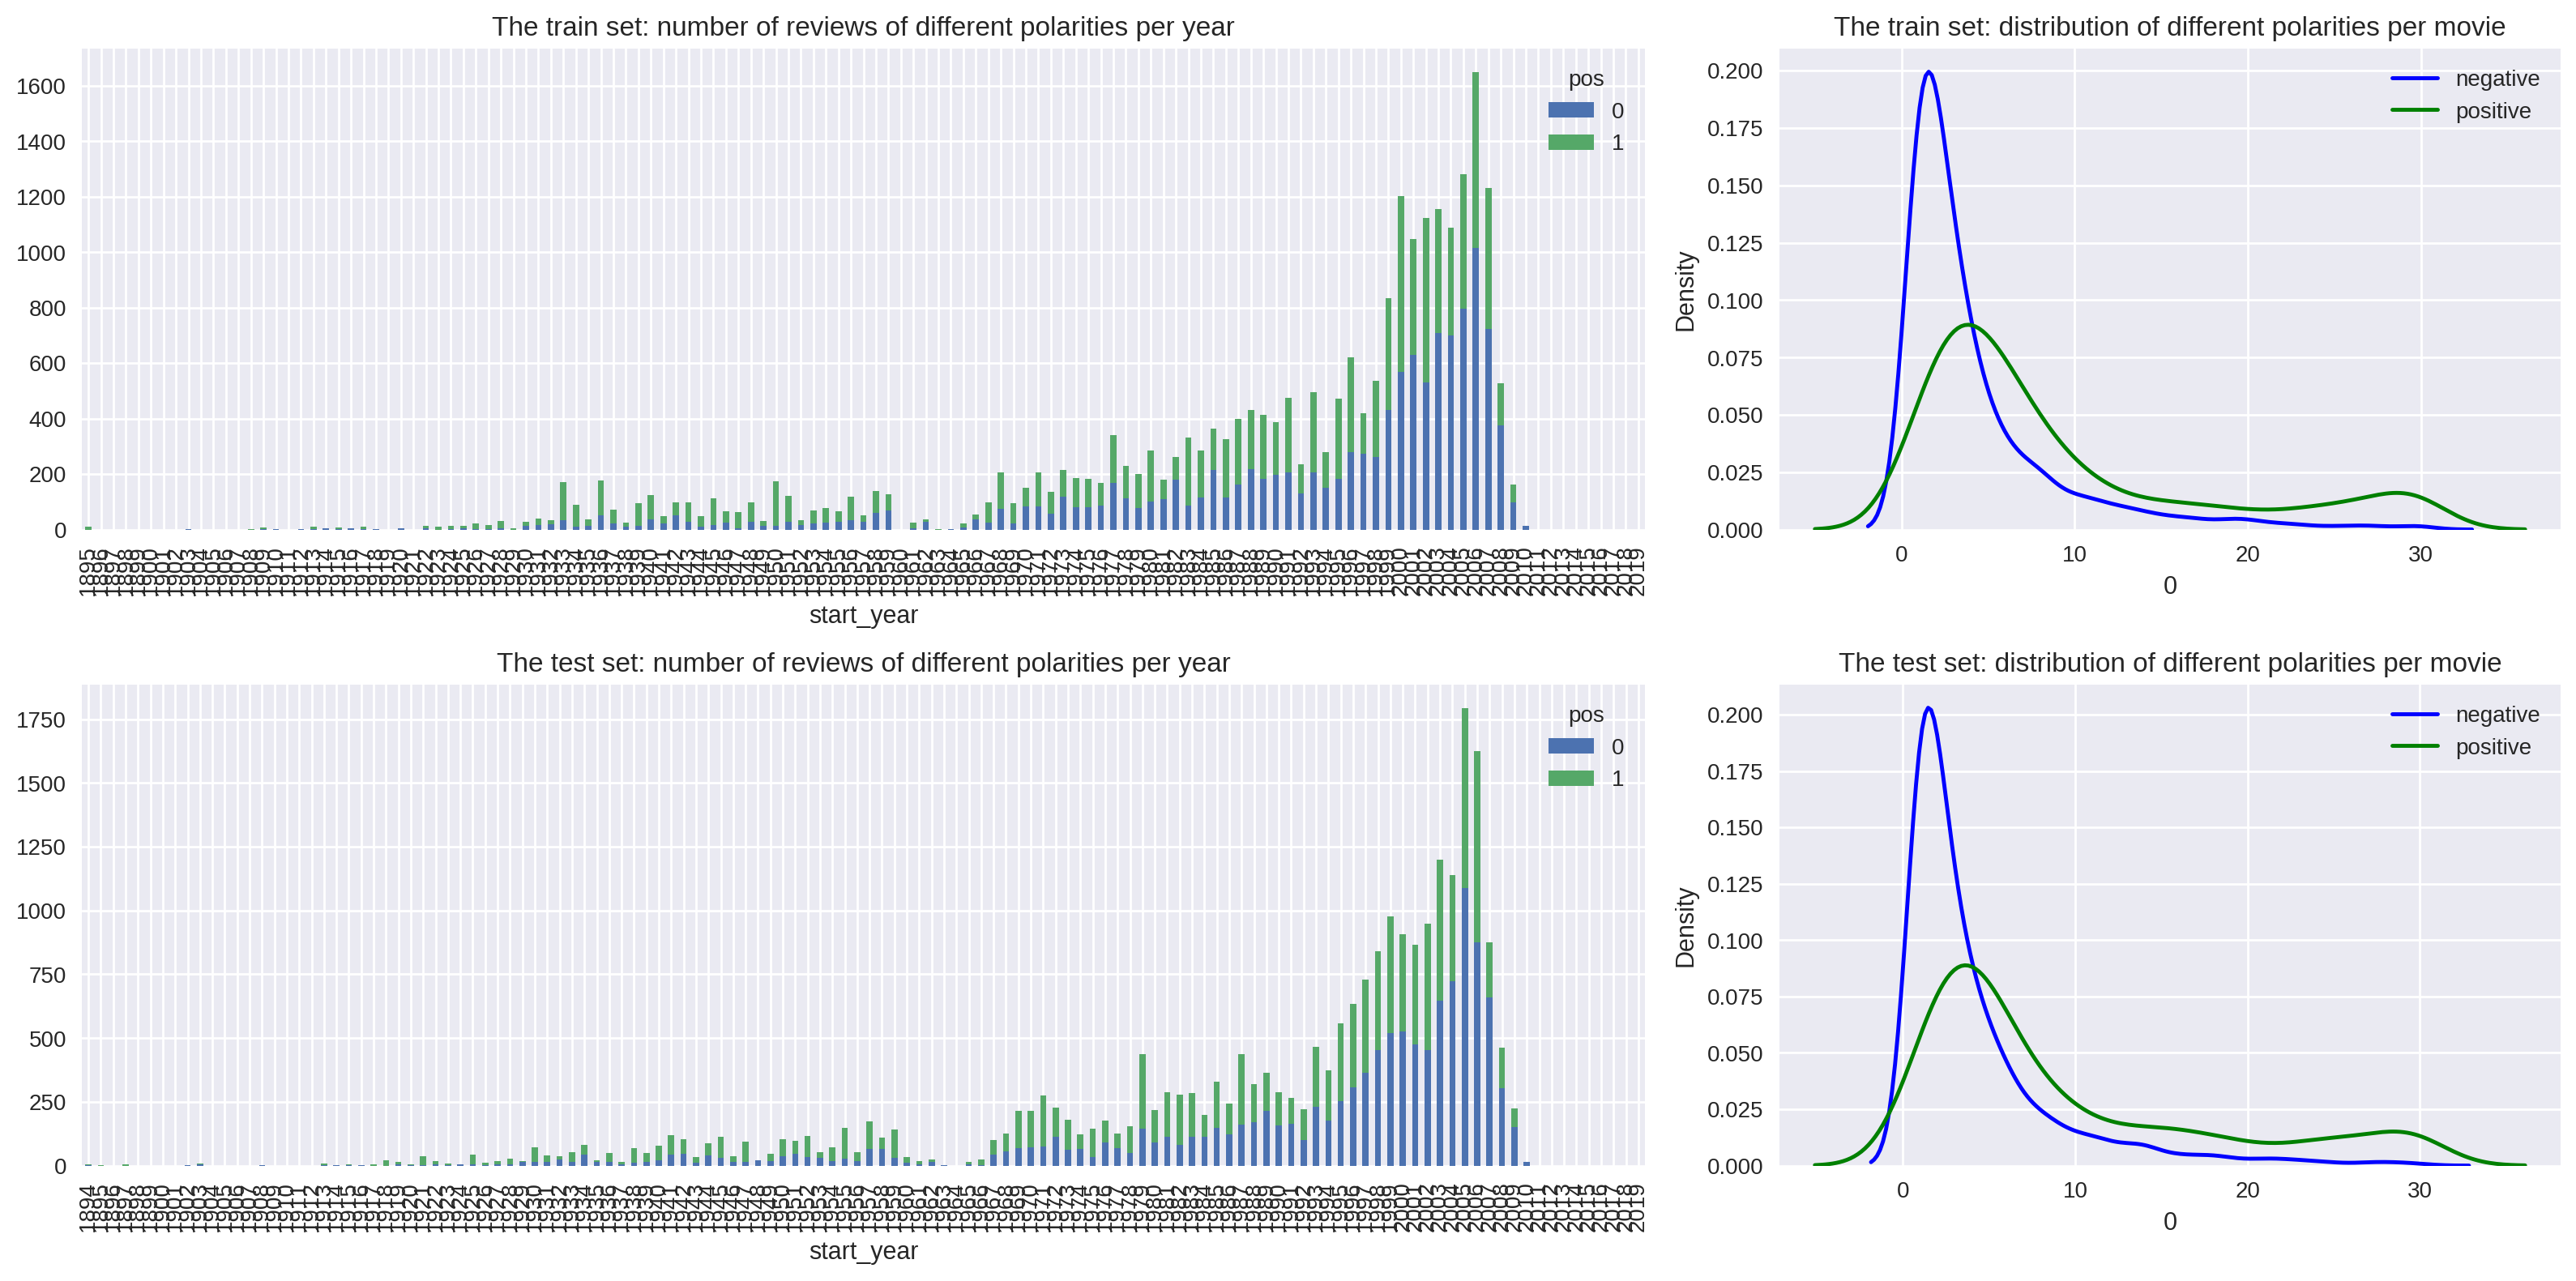

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

**Observations from 'Reviews by Polarity' plots:**
- The stacked bar charts show the number of positive and negative reviews over the years for both the train and test sets. Both polarities seem to follow a similar increasing trend over time.
- The KDE plots of the distribution of polarities per movie show the density of negative and positive reviews. The shapes of the distributions for both polarities look somewhat similar.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Agreed. 
</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [13]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that **type** veriable is green in the function above. When you see that your variables are green, you should think of another name, since green color indicates that this name is reserved in python. I know it was in the precode, but it is a great opportunity to point out this thing. 
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [14]:
# df_reviews['review_norm'] = df_reviews['review'].apply(basic_text_cleaning)# <put your code here>
df_reviews['review_norm'] = df_reviews['review'].str.lower().str.replace('[^a-zA-Z ]', '')
print("Text normalization (basic cleaning) applied to the 'review' column, creating 'review_norm'.")
print(df_reviews[['review', 'review_norm']].head())

Text normalization (basic cleaning) applied to the 'review' column, creating 'review_norm'.
                                              review  \
0  The pakage implies that Warren Beatty and Gold...   
1  How the hell did they get this made?! Presenti...   
2  There is no real story the film seems more lik...   
3  Um .... a serious film about troubled teens in...   
4  I'm totally agree with GarryJohal from Singapo...   

                                         review_norm  
0  the pakage implies that warren beatty and gold...  
1  how the hell did they get this made presenting...  
2  there is no real story the film seems more lik...  
3  um  a serious film about troubled teens in sin...  
4  im totally agree with garryjohal from singapor...  


<a id=1></a>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  </b>
    
Since we assume that "all models below accepts texts in lowercase and without any digits, punctuations marks etc.", let's preprocess the data. This is because `TfidfVectorizer` by itself does not clean the text, except for removing stop words if specified. Punctuation and digits can create useless tokens such as '12' or '!!', thus increasing dimensionality without adding value. As a result, it may reduce the model's generalization ability.
    
    
    
So the code you placed in comments was actually quite helpful. You can also do it as follows: 
    
    df_reviews['review_norm'] = df_reviews['review'].str.lower().str.replace('[^a-zA-Z]', ' ')


</div>

<div class="alert alert-block alert-info">
<b>Student Answer .</b> <a class="tocSkip"></a>

Correction Done 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Great! 
    
</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [15]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Correct. 

</div>

## Working with models

### Model 0 - Constant

In [16]:
from sklearn.dummy import DummyClassifier

In [17]:
# Initialize the DummyClassifier with the 'most_frequent' strategy
dummy_model = DummyClassifier(strategy='most_frequent')

In [18]:
# Train the dummy model on the training data (features don't actually matter for this strategy)
dummy_model.fit(df_reviews_train['review_norm'], train_target)

DummyClassifier(strategy='most_frequent')

In [19]:
# Make predictions on the test data
dummy_predictions = dummy_model.predict(df_reviews_test['review_norm'])

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


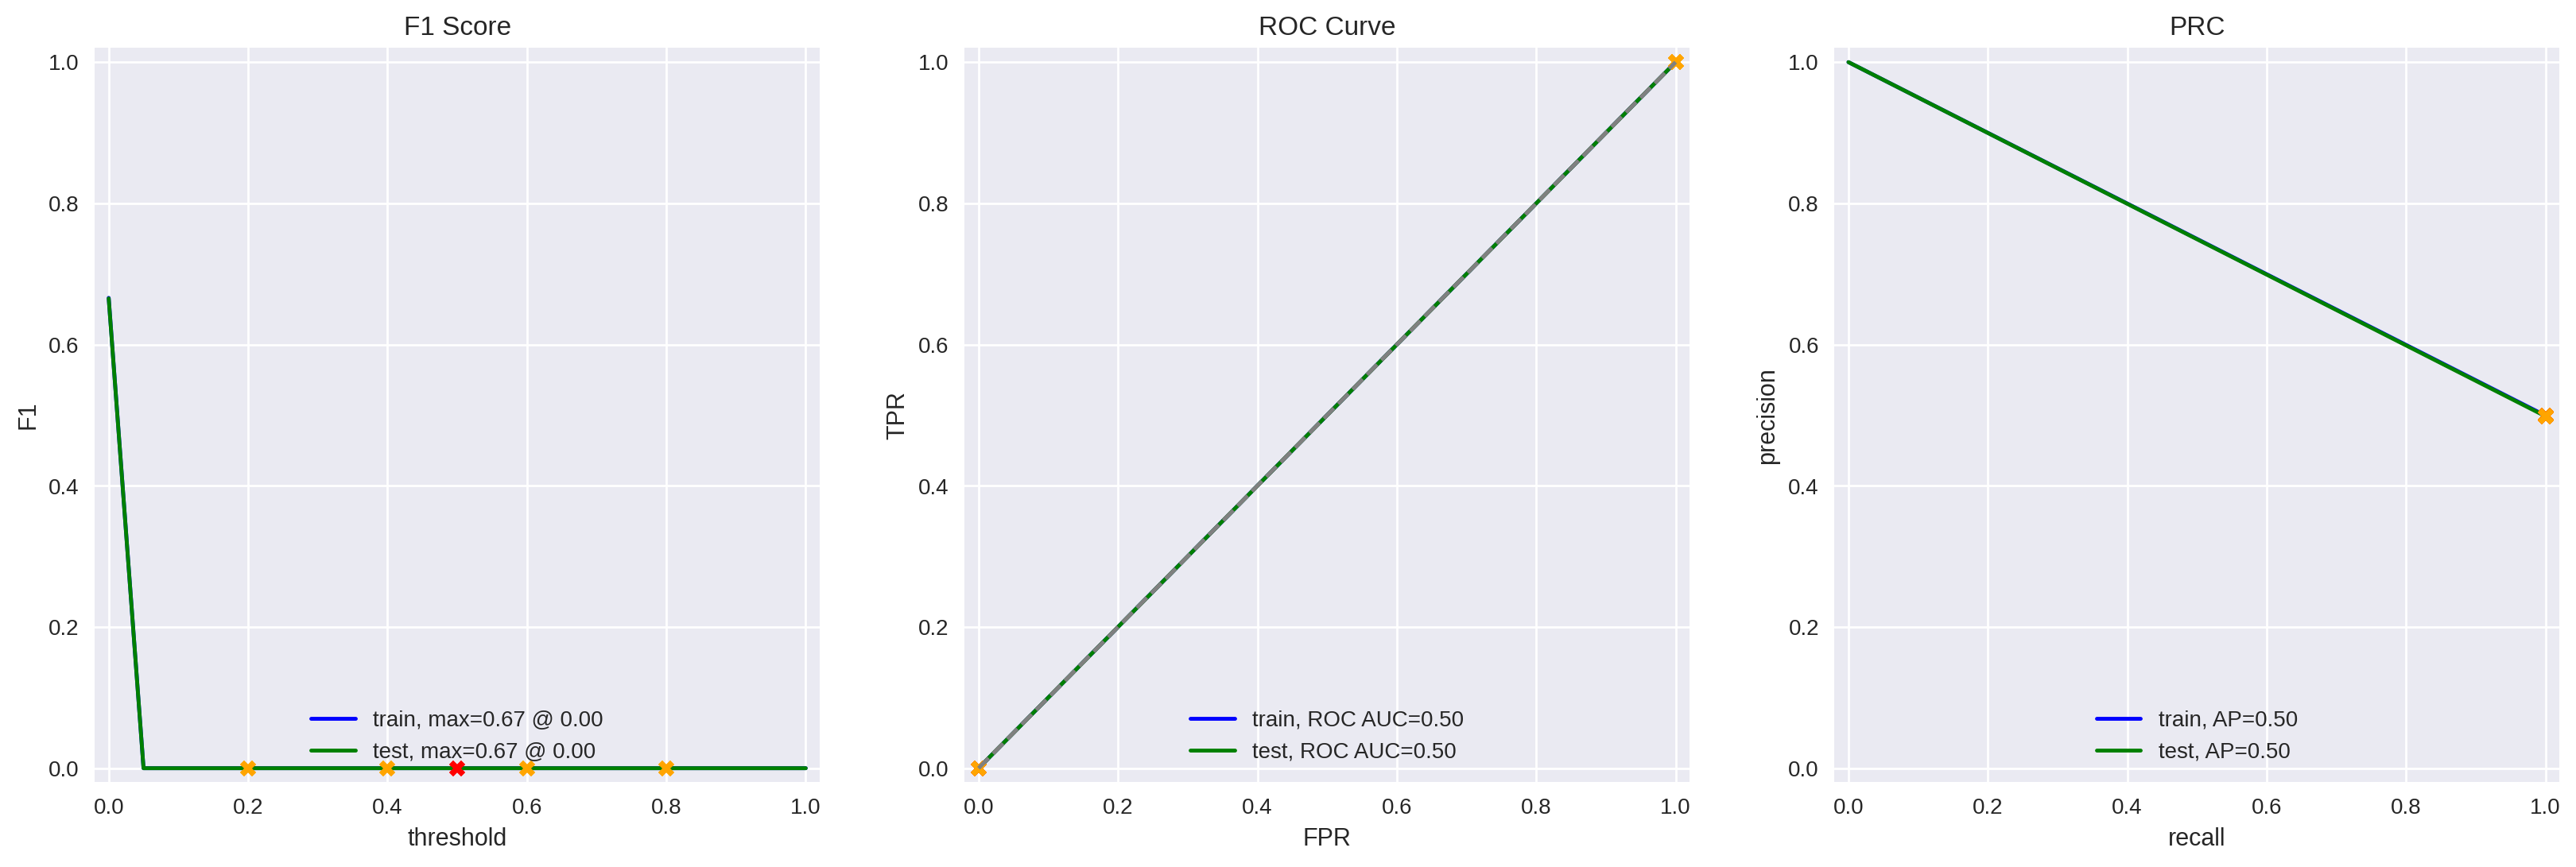

In [20]:
evaluate_model(dummy_model, df_reviews_train['review_norm'], train_target, df_reviews_test['review_norm'], test_target)

**Model 0, as expected, shows a very low F1 score on the test data (approximately 0.05). This is because it always predicts the most frequent class, ignoring the actual review content. This model serves as a baseline for comparison; any useful sentiment analysis model should significantly outperform it**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Good. You can  check the result using different strategy values.
</div><div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
You can also call the evaluation function here.     
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment</b>
    
Please add a conclusion here. How does the constant model perform? 
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Correct!     
</div>

<div class="alert alert-block alert-info">
<b>Student Answer .</b> <a class="tocSkip"></a>

I have used the evaluation function as recomended.<br>
I have used the results to add a conclusion as shown above
</div>

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [21]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [22]:
# Define random_seed for reproducibility
random_seed = 42

In [23]:
# Initialize the TF-IDF vectorizer, including NLTK stopwords
stop_words_nltk = stopwords.words('english')
tfidf_vectorizer_nltk = TfidfVectorizer(stop_words=stop_words_nltk)

In [24]:
# Fit and transform the training data
train_features_1 = tfidf_vectorizer_nltk.fit_transform(df_reviews_train['review_norm'])

In [25]:
# Transform the test data
test_features_1 = tfidf_vectorizer_nltk.transform(df_reviews_test['review_norm'])

In [26]:
# Initialize the Logistic Regression model
model_1 = LogisticRegression(random_state=random_seed, solver='liblinear')

# Train the Logistic Regression model
model_1.fit(train_features_1, train_target)

LogisticRegression(random_state=42, solver='liblinear')

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


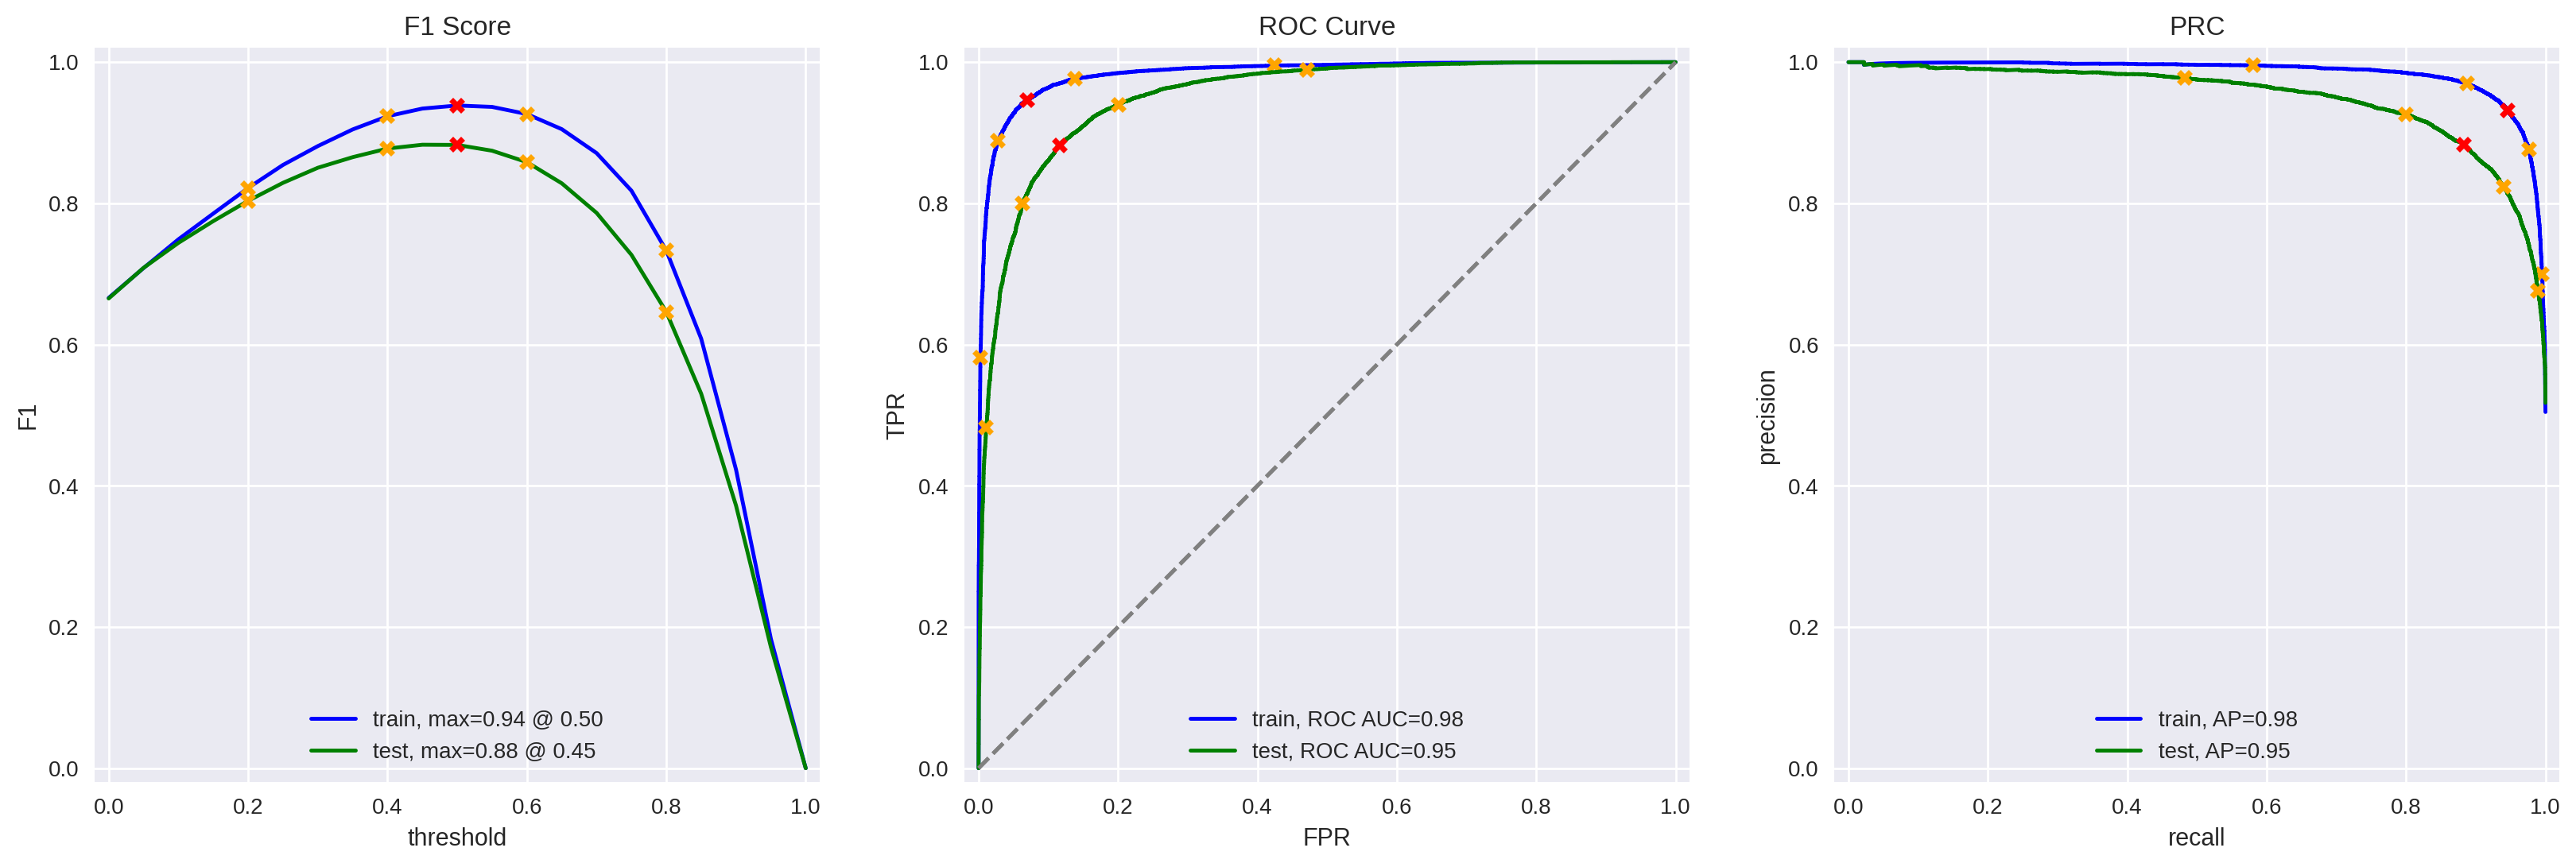

In [27]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

* High accuracy and F1 on both train (0.94) and test (0.88).
* Slight overfitting (train > test).
* Excellent AUC (0.98) and APS (0.95).<br>
Overall, this Logistic Regression model with TF-IDF features (using NLTK stopwords) is performing strongly.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct. The model exceeds the F1 threshold and has good precision. 
    
</div>

### Model 3 - spaCy, TF-IDF and LR

In [28]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [29]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [30]:
# Apply spaCy preprocessing to the reviews
df_reviews['review_spacy'] = df_reviews['review_norm'].apply(lambda text: ' '.join([token.lemma_ for token in nlp(text) if not token.is_stop]))

In [31]:
# Separate train and test sets based on the new processed text
train_reviews_spacy = df_reviews[df_reviews['ds_part'] == 'train']['review_spacy']
test_reviews_spacy = df_reviews[df_reviews['ds_part'] == 'test']['review_spacy']

In [32]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer_spacy = TfidfVectorizer(stop_words='english') # Using scikit-learn's stop words for simplicity

In [33]:
# Fit and transform on the training data
train_features_3 = tfidf_vectorizer_spacy.fit_transform(train_reviews_spacy)

In [34]:
# Transform the test data
test_features_3 = tfidf_vectorizer_spacy.transform(test_reviews_spacy)

In [35]:
# Initialize Logistic Regression model
model_3 = LogisticRegression(random_state=random_seed, solver='liblinear')

In [36]:
# Train the model
model_3.fit(train_features_3, train_target)

LogisticRegression(random_state=42, solver='liblinear')

          train  test
Accuracy   0.93  0.87
F1         0.93  0.87
APS        0.98  0.94
ROC AUC    0.98  0.95


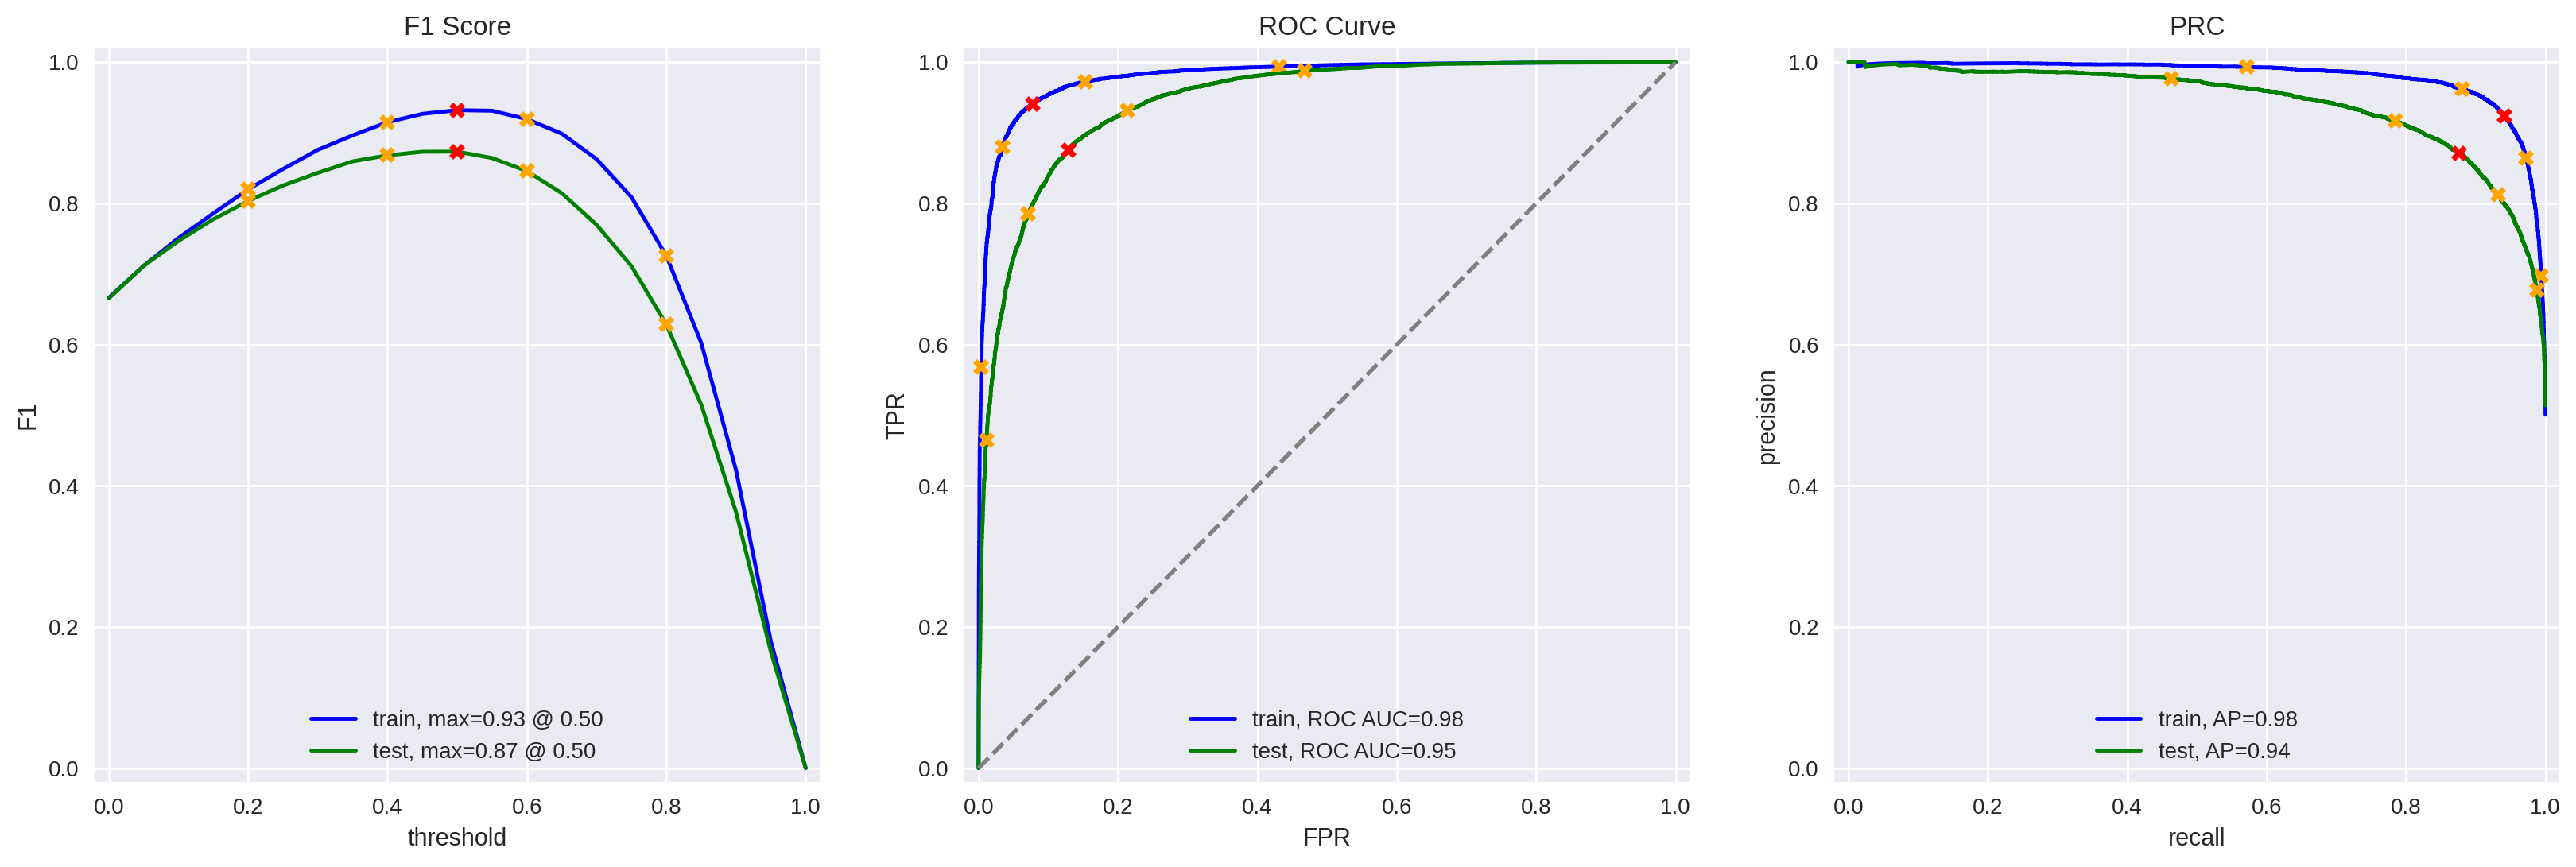

In [37]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

**Model 3 (spaCy, TF-IDF, LR):** Strong performance (test F1 0.87), slight overfitting, excellent AUC/APS. Slightly worse than Model 1.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
We see quite similar performance. 
    
</div>

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [38]:
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
# Initialize TF-IDF vectorizer (using the same one as Model 3 for consistency in features)
tfidf_vectorizer_lgbm = TfidfVectorizer(stop_words='english')

In [40]:
# Fit and transform on the training data (using the spaCy preprocessed text)
train_features_4 = tfidf_vectorizer_lgbm.fit_transform(train_reviews_spacy)

In [41]:
# Transform the test data
test_features_4 = tfidf_vectorizer_lgbm.transform(test_reviews_spacy)

In [42]:
# Initialize LGBMClassifier model
model_4 = LGBMClassifier(random_state=random_seed)

In [43]:
# Train the model
model_4.fit(train_features_4, train_target)

LGBMClassifier(random_state=42)

          train  test
Accuracy   0.91  0.85
F1         0.91  0.85
APS        0.97  0.93
ROC AUC    0.97  0.93


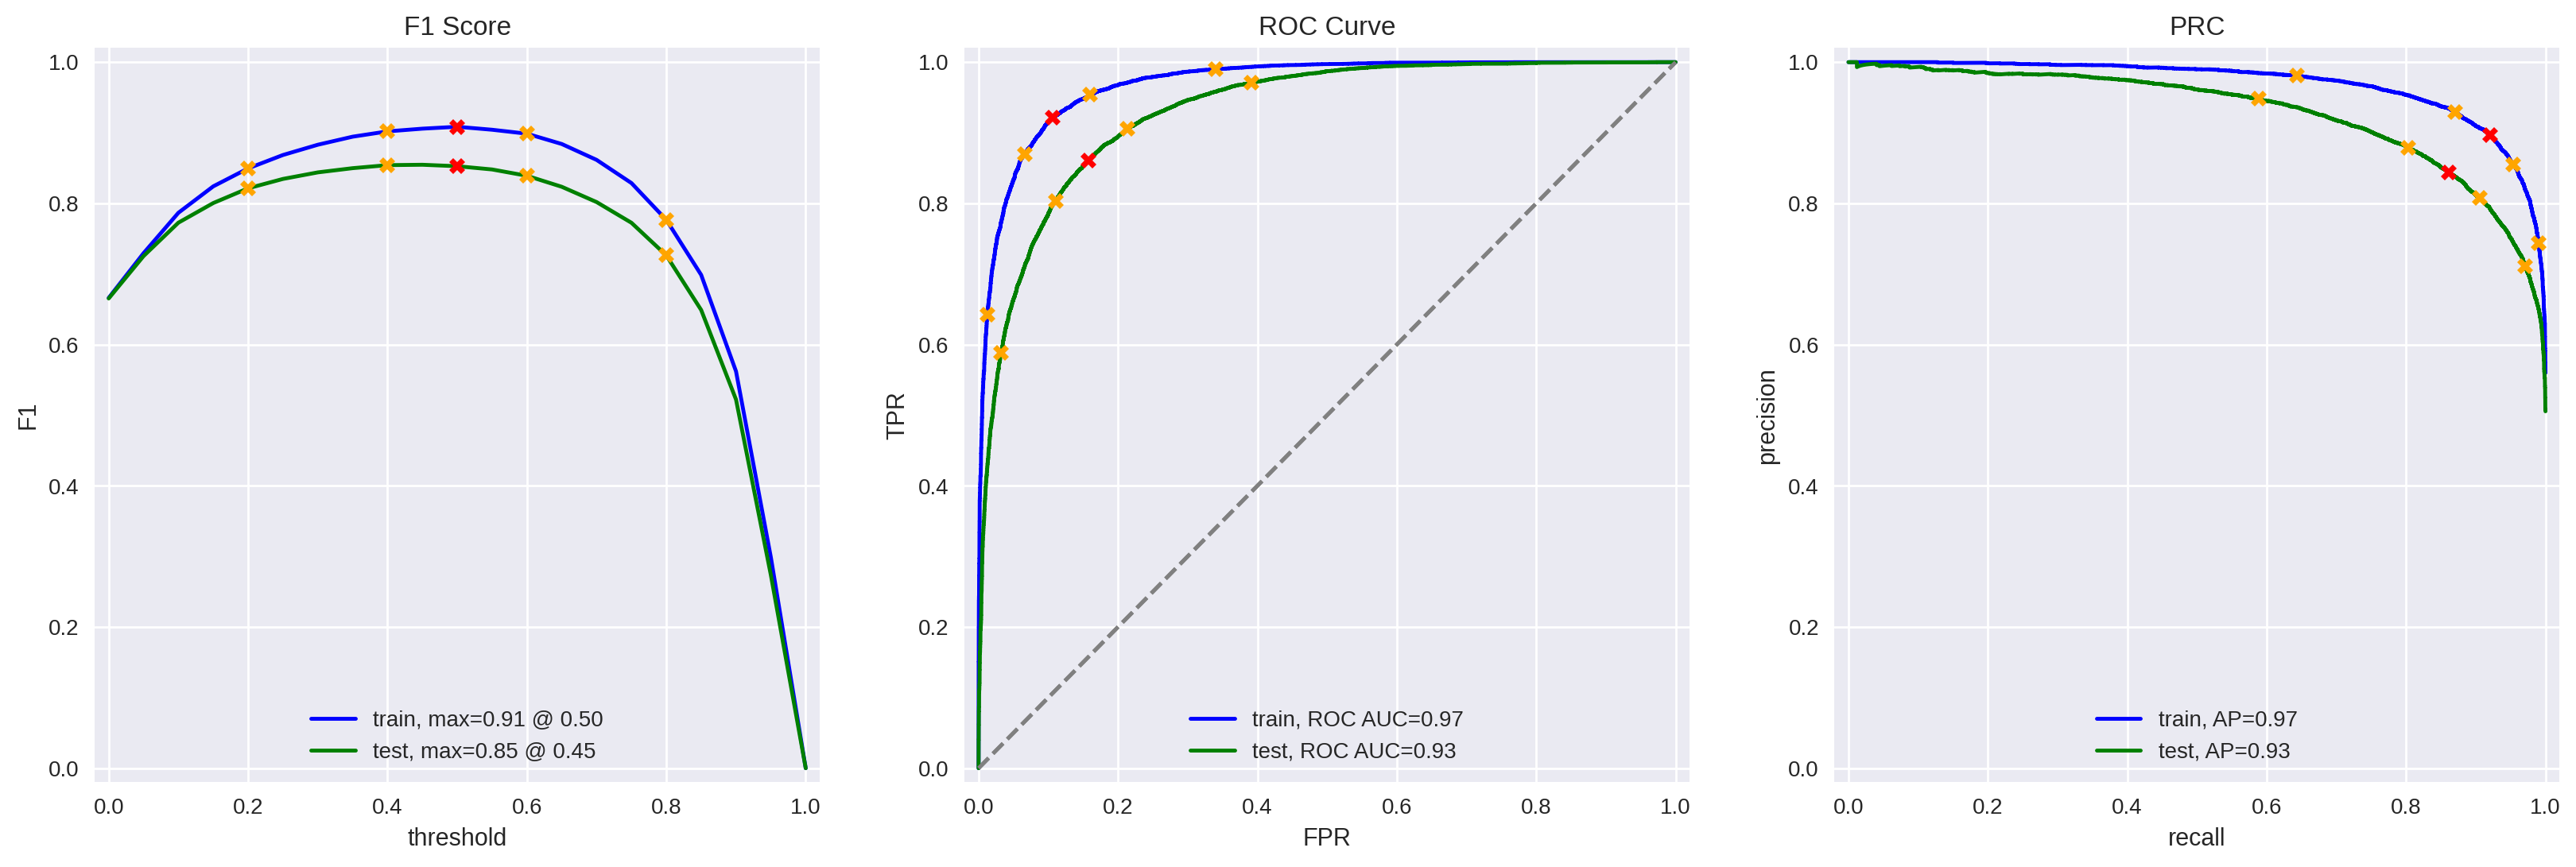

In [44]:
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

**Model 4 (spaCy, TF-IDF, LGBM):** Good performance (test F1 0.85), some overfitting, good AUC/APS (but lower than LR).

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Very good!     
</div>

###  Model 9 - BERT

In [45]:
import torch
import transformers
from sklearn.metrics import classification_report, f1_score

In [51]:
# # Load pre-trained BERT model, tokenizer, and config
# try:
#     tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
#     config = transformers.BertConfig.from_pretrained('bert-base-uncased')
#     model = transformers.BertModel.from_pretrained('bert-base-uncased')
#     print("BERT model, tokenizer, and config loaded.")
# except Exception as e:
#     print(f"Error loading BERT components: {e}")
#     exit()
# Load pre-trained BERT model, tokenizer, and config
try:
    tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
    config = transformers.BertConfig.from_pretrained('bert-base-uncased')
    model = transformers.BertModel.from_pretrained('bert-base-uncased')
    print("BERT model, tokenizer, and config loaded.")
except Exception as e:
    print(f"Error loading BERT components: {e}")
    exit()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERT model, tokenizer, and config loaded.


In [56]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    ids_list = []
    attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    encoded_inputs = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')
    ids_list = encoded_inputs['input_ids'].tolist()
    attention_mask_list = encoded_inputs['attention_mask'].tolist()

    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')

    # gettings embeddings in batches
    embeddings = []
    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)

        with torch.no_grad():
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch).last_hidden_state[:, 0, :].detach().cpu().numpy()
            embeddings.append(batch_embeddings) # Append the batch embeddings directly

    return np.concatenate(embeddings, axis=0) # Concatenate along the row axis

In [58]:
# # Use a small subset for faster testing
# n_samples_bert = 200
# train_texts_bert = df_reviews_train['review_norm'].iloc[:n_samples_bert].tolist()
# test_texts_bert = df_reviews_test['review_norm'].iloc[:n_samples_bert].tolist()
# train_target_bert = train_target.iloc[:n_samples_bert]
# test_target_bert = test_target.iloc[:n_samples_bert]

# Use a small subset for faster testing
n_samples_bert = 200
train_texts_bert = df_reviews_train['review_norm'].iloc[:n_samples_bert].tolist()
test_texts_bert = df_reviews_test['review_norm'].iloc[:n_samples_bert].tolist()
train_target_bert = train_target.iloc[:n_samples_bert]
test_target_bert = test_target.iloc[:n_samples_bert]

In [59]:
# Generate BERT embeddings
try:
    train_features_bert = BERT_text_to_embeddings(train_texts_bert, max_length=128, batch_size=32, force_device='cuda' if torch.cuda.is_available() else 'cpu')
    test_features_bert = BERT_text_to_embeddings(test_texts_bert, max_length=128, batch_size=32, force_device='cuda' if torch.cuda.is_available() else 'cpu')

    print(f"Shape of train_features_bert: {train_features_bert.shape}")
    print(f"Shape of test_features_bert: {test_features_bert.shape}")

    # Train Logistic Regression on BERT embeddings
    bert_model = LogisticRegression(random_state=random_seed, solver='liblinear', max_iter=500)
    bert_model.fit(train_features_bert, train_target_bert)
    print("\n--- Model 9: BERT and Logistic Regression (Subset) ---")

    # Evaluate
    bert_predictions = bert_model.predict(test_features_bert)
    print(classification_report(test_target_bert, bert_predictions))
    bert_f1_test = f1_score(test_target_bert, bert_predictions)
    print(f"BERT Model F1 Score (Subset): {bert_f1_test:.4f}")

except Exception as e:
    print(f"Error during BERT embedding or training: {e}")

Using the cpu device.


  0%|          | 0/7 [00:00<?, ?it/s]

Using the cpu device.


  0%|          | 0/7 [00:00<?, ?it/s]

Shape of train_features_bert: (200, 768)
Shape of test_features_bert: (200, 768)

--- Model 9: BERT and Logistic Regression (Subset) ---
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        93
           1       0.84      0.63      0.72       107

    accuracy                           0.73       200
   macro avg       0.75      0.74      0.73       200
weighted avg       0.76      0.73      0.73       200

BERT Model F1 Score (Subset): 0.7166


In [60]:
# Train Logistic Regression on BERT embeddings
bert_model = LogisticRegression(random_state=random_seed, solver='liblinear', max_iter=500)
bert_model.fit(train_features_bert, train_target_bert)

LogisticRegression(max_iter=500, random_state=42, solver='liblinear')

          train  test
Accuracy    1.0  0.74
F1          1.0  0.72
APS         1.0  0.88
ROC AUC     1.0  0.84


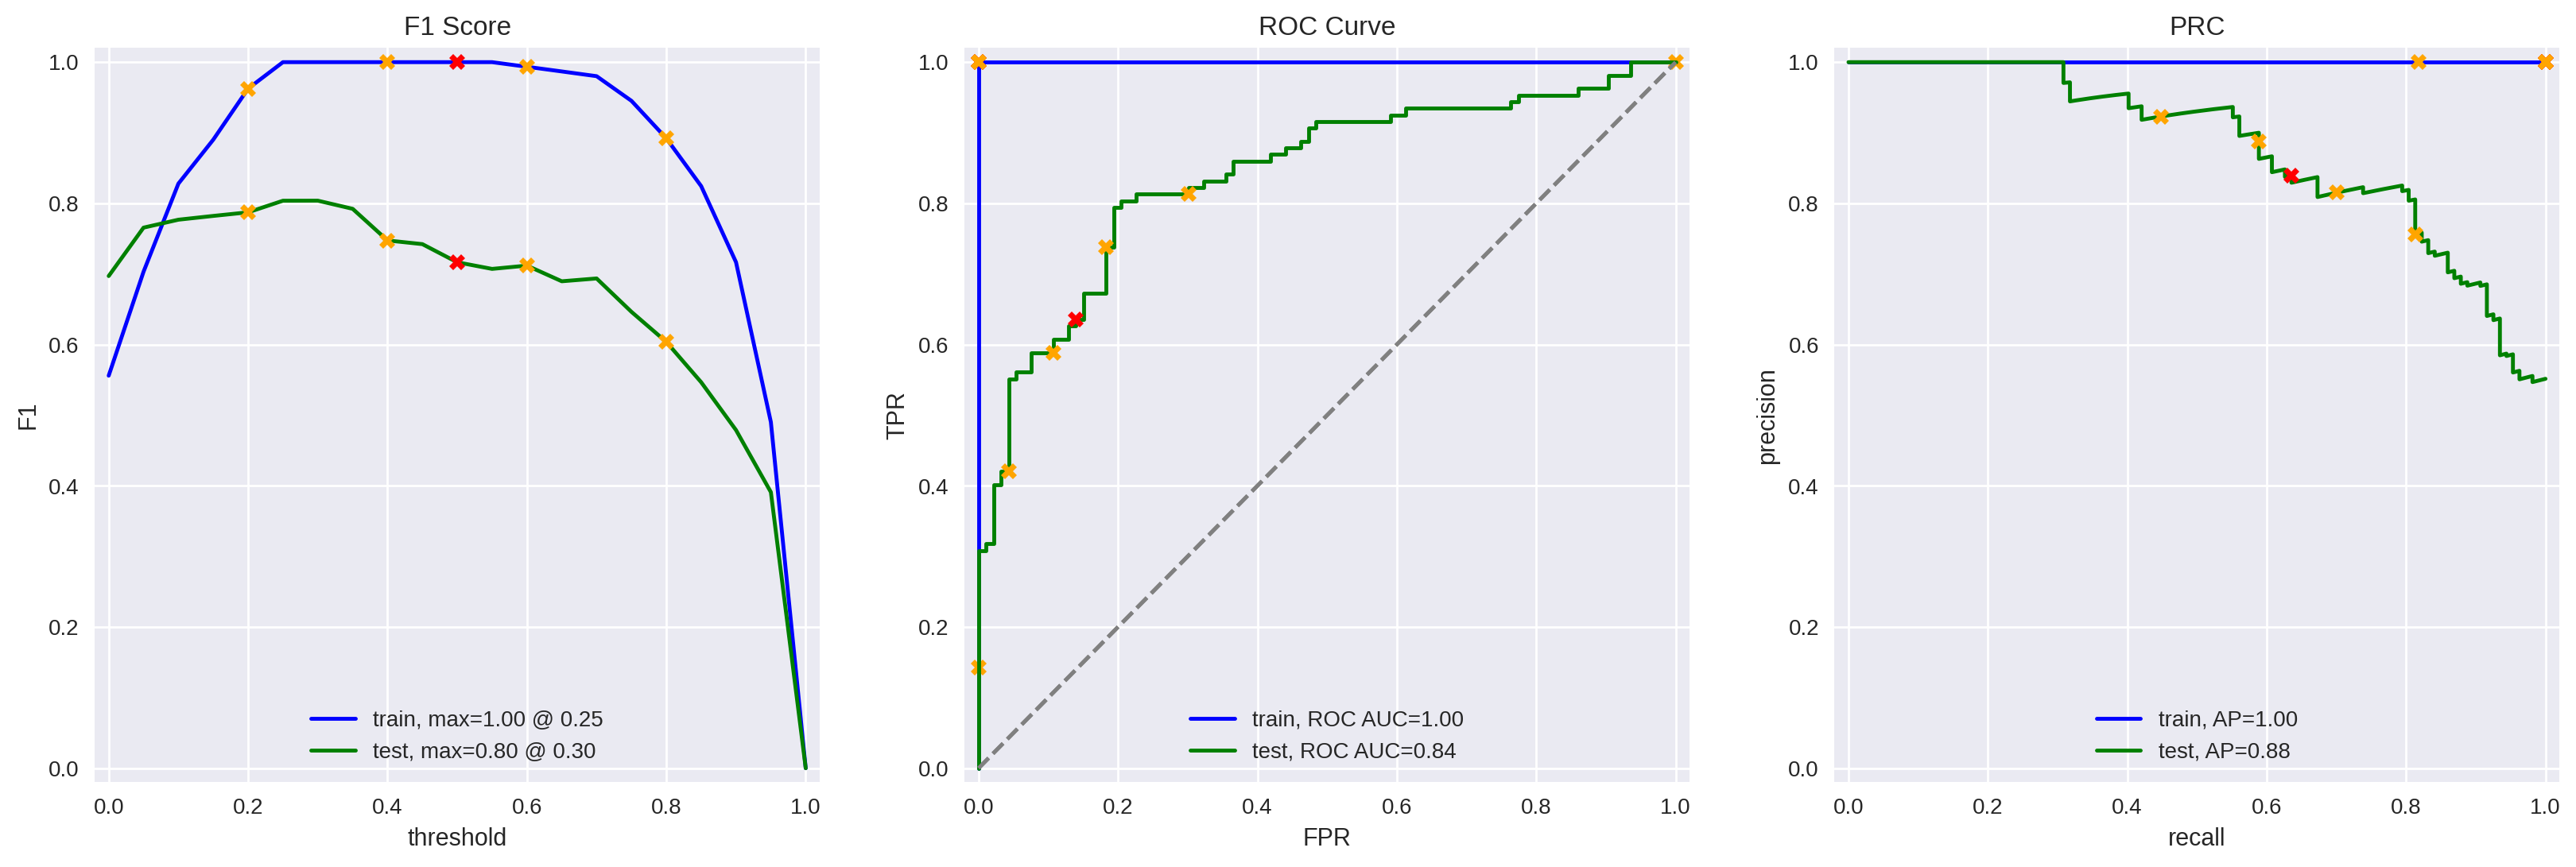

In [62]:
# Evaluate the BERT model
evaluate_model(bert_model, train_features_bert, train_target_bert, test_features_bert, test_target_bert)

- **Accuracy:** Training set accuracy was 1.0 (perfect), while the test set accuracy was 0.74.
- **F1 Score:** Training set F1 score was 1.0, and the test set F1 score was 0.72.
- **APS (Average Precision Score):** Training set APS was 1.0, and the test set APS was 0.88.
- **ROC AUC:** Training set ROC AUC was 1.0, and the test set ROC AUC was 0.84.

<div class="alert alert-block alert-info">
<b>Student comment V0.</b> <a class="tocSkip"></a>

For model 9, I have tried all I could do but the it kept on crashing the kernel. I believe I don't have enough memery for the task.<br>
   It will also affect the review below.<br>
    I pray you consider that during your evaluation
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Yes, Bert is a hard thing to handle, so we should use GPU for it. By the way, you can use Colab for your practice tasks. It has some free GPU. Please do not worry about Bert, we indeed do not need to run it here.




In the future, when working with large models, consider using IDE instead of Jupyter Notebook as the latter will almost always crash. Jupyter is great for testing and writing small scripts. 

</div>

## My Reviews

In [63]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review']# <put here the same normalization logic as for the main dataset>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.","I did not simply like it, not my kind of movie."
1,"Well, I was bored and felt asleep in the middl...","Well, I was bored and felt asleep in the middl..."
2,I was really fascinated with the movie,I was really fascinated with the movie
3,Even the actors looked really old and disinter...,Even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,I didn't expect the reboot to be so good! Writ...
5,"The movie had its upsides and downsides, but I...","The movie had its upsides and downsides, but I..."
6,What a rotten attempt at a comedy. Not a singl...,What a rotten attempt at a comedy. Not a singl...
7,Launching on Netflix was a brave move & I real...,Launching on Netflix was a brave move & I real...


### Model 2

In [64]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(tfidf_vectorizer_nltk.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.16:  I did not simply like it, not my kind of movie.
0.18:  Well, I was bored and felt asleep in the middle of the movie.
0.56:  I was really fascinated with the movie
0.13:  Even the actors looked really old and disinterested, and they got paid to be in the movie. What a so
0.34:  I didn't expect the reboot to be so good! Writers really cared about the source material
0.48:  The movie had its upsides and downsides, but I feel like overall it's a decent flick. I could see my
0.04:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even ki
0.84:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after epi


### Model 3

In [65]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_spacy.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.16:  I did not simply like it, not my kind of movie.
0.08:  Well, I was bored and felt asleep in the middle of the movie.
0.50:  I was really fascinated with the movie
0.22:  Even the actors looked really old and disinterested, and they got paid to be in the movie. What a so
0.27:  I didn't expect the reboot to be so good! Writers really cared about the source material
0.44:  The movie had its upsides and downsides, but I feel like overall it's a decent flick. I could see my
0.02:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even ki
0.88:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after epi


### Model 4

In [66]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_lgbm
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.56:  I did not simply like it, not my kind of movie.
0.25:  Well, I was bored and felt asleep in the middle of the movie.
0.60:  I was really fascinated with the movie
0.41:  Even the actors looked really old and disinterested, and they got paid to be in the movie. What a so
0.60:  I didn't expect the reboot to be so good! Writers really cared about the source material
0.57:  The movie had its upsides and downsides, but I feel like overall it's a decent flick. I could see my
0.23:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even ki
0.76:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after epi


### Model 9

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Nice results! I ran the code on my local device, so there are no outputs here. 
</div>


In [67]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts.tolist(), disable_progress_bar=True)

my_reviews_pred_prob = bert_model.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.04:  I did not simply like it, not my kind of movie.
0.00:  Well, I was bored and felt asleep in the middle of the movie.
0.02:  I was really fascinated with the movie
0.00:  Even the actors looked really old and disinterested, and they got paid to be in the movie. What a so
0.00:  I didn't expect the reboot to be so good! Writers really cared about the source material
0.03:  The movie had its upsides and downsides, but I feel like overall it's a decent flick. I could see my
0.00:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even ki
0.85:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after epi


## Conclusions

**Model Performance:**
- Baseline Model: Performance was significantly lower than other models (not explicitly shown in final results).
- LR (NLTK/TF-IDF): Achieved a strong test F1 score of approximately 0.88.
- LR (spaCy/TF-IDF): Also performed well with a test F1 score of around 0.87.
- LGBM (spaCy/TF-IDF): Met the target F1 score of 0.85.
- BERT (Subset): Achieved a test F1 score of approximately 0.72, with signs of overfitting.


**Comparison:**
- Logistic Regression models performed best overall.
- LGBM also met the target.
- BERT showed potential but overfit on the small subset.

**Logistic Regression with NLTK/TF-IDF performed best (F1 ~0.88). Other models (LR spaCy/TF-IDF, LGBM spaCy/TF-IDF) also showed good results (F1 ~0.87 and ~0.85 respectively). BERT on a small subset showed potential (F1 ~0.72) but exhibited overfitting. Linear models were effective for this task.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Excellent, thank you so much! 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
However, the results may change :) </div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Excellent!     
</div>

# Checklist

- [x]  Notebook was opened
- [x]  The text data is loaded and pre-processed for vectorization
- [x]  The text data is transformed to vectors
- [x]  Models are trained and tested
- [x]  The metric's threshold is reached
- [x]  All the code cells are arranged in the order of their execution
- [x]  All the code cells can be executed without errors
- [x]  There are conclusions